In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('aux/datasets/exercices.csv', parse_dates = ['date'], usecols = list(range(0, 6)))

In [3]:
df.dtypes

date          datetime64[ns]
km                   float64
time                  object
seconds              float64
minutes              float64
min_per_km           float64
dtype: object

In [4]:
df.sort_index(inplace = True)

In [5]:
df.head()

,date,km,time,seconds,minutes,min_per_km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [6]:
df.corr()

,km,seconds,minutes,min_per_km
km,1.000000,0.997203,0.997203,0.629387
seconds,0.997203,1.000000,1.000000,0.642184
minutes,0.997203,1.000000,1.000000,0.642184
min_per_km,0.629387,0.642184,0.642184,1.000000


**01 - What is the maximum value in the "minutes" column?**

In [7]:
df['minutes'].max()

260.71666666666664

**02 - What is the minimum value in the "km" column, above 2.0?**

In [8]:
df['km'][df['km'] > 2].min()

2.01

**03 - Create a plot with the accumulated frequency of the "distance" column.**

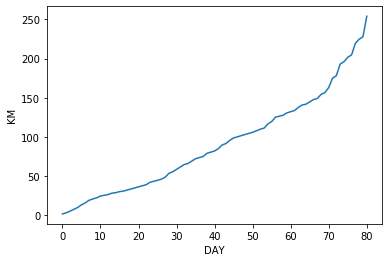

In [9]:
plt.xlabel('DAY')
plt.ylabel('KM')
df['km'].cumsum().plot();

**04 - What is the day of the week at the zero index?**

In [10]:
df['date'][0].strftime('%A')

'Sunday'

**05 - What is the day of the week on the first 5 indexes?**

In [11]:
df['date'].map(lambda weekday: weekday.strftime('%A')).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: date, dtype: object

**06 - Create a new column in the dataframe with all days of the week (as text).**

In [12]:
df['weekday'] = df['date'].map(lambda weekday: weekday.strftime('%A'))
df.head(10)

,date,km,time,seconds,minutes,min_per_km,weekday
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
5,2015-08-08,3.40,NaN,NaN,NaN,NaN,Saturday
6,2015-08-09,2.50,NaN,NaN,NaN,NaN,Sunday
7,2015-08-10,3.36,00:28:37,1717.0,28.616667,8.516865,Monday
8,2015-08-11,1.67,00:13:07,787.0,13.116667,7.854291,Tuesday
9,2015-08-12,1.42,00:10:35,635.0,10.583333,7.453052,Wednesday


**07 - Create a bar chart with the distance covered on each day of the week.**

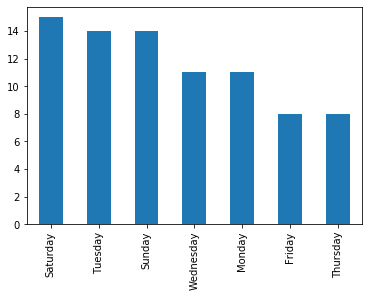

In [13]:
df[df['km'] > 0]['weekday'].value_counts().plot(kind = 'bar');

**08 - Delete the "time" column from the dataframe.**

In [14]:
del(df['time'])
df.head()

,date,km,seconds,minutes,min_per_km,weekday
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


**09 - What is the total number of taxi rides per day of the week?**

In [15]:
df.groupby('weekday').size()

weekday
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

**10 - What is the average for each column per day of the week?**

In [16]:
df.groupby('weekday').mean()

,km,seconds,minutes,min_per_km
weekday,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706
